# Análise de dados em Turbinas Eólicas

## 1º Análise exploratória

###### Arquivo: [wind-turbine-scada-dataset](https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset)

Em Turbinas Eólicas, os Sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, energia gerada etc. por intervalos de 10 minutos. Este arquivo foi retirado do sistema Scada de uma turbina eólica que está funcionando e gerando energia na Turquia.

Os dados do arquivo são:
- Data/Hora (para intervalos de 10 minutos).
- LV ActivePower (kW): A potência gerada pela turbina naquele momento.
- Velocidade do vento (m/s): A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade).
- TheoreticalPowerCurve (KWh): Os valores teóricos de potência que a turbina gera com aquela velocidade do vento que é dada pelo fabricante da turbina.
- Direção do Vento (°): A direção do vento na altura do cubo da turbina (as turbinas eólicas giram para esta direção automaticamente).

In [ ]:
# Importando as bibliotecas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
# Lendo o arquivo .CSV e visualizando seus 5 primeiros valores:
T1 = pd.read_csv('T1.csv')
T1.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
# Mudando o nome das colunas:
T1.columns = ["Data/hora", "Potência(kW)", "VelocidadeVento(m/s)", "PotênciaTeórica(kW)", "DireçãoVento(°)"]
T1.head()

,Data/hora,Potência(kW),VelocidadeVento(m/s),PotênciaTeórica(kW),DireçãoVento(°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
# Tipos de variáveis e dimensão do dataframe:
T1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data/hora             50530 non-null  object 
 1   Potência(kW)          50530 non-null  float64
 2   VelocidadeVento(m/s)  50530 non-null  float64
 3   PotênciaTeórica(kW)   50530 non-null  float64
 4   DireçãoVento(°)       50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [ ]:
# Transformando a coluna Data/hora para o tipo datetime:
T1['Data/hora'] = pd.to_datetime(T1['Data/hora'])
T1.info()
T1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data/hora             50530 non-null  datetime64[ns]
 1   Potência(kW)          50530 non-null  float64       
 2   VelocidadeVento(m/s)  50530 non-null  float64       
 3   PotênciaTeórica(kW)   50530 non-null  float64       
 4   DireçãoVento(°)       50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


,Data/hora,Potência(kW),VelocidadeVento(m/s),PotênciaTeórica(kW),DireçãoVento(°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
# Detalhes estatísticos básicos:
T1.describe()

,Potência(kW),VelocidadeVento(m/s),PotênciaTeórica(kW),DireçãoVento(°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


## 2º Plotando os gráficos

###### Gráfico de dispersão (potência real):

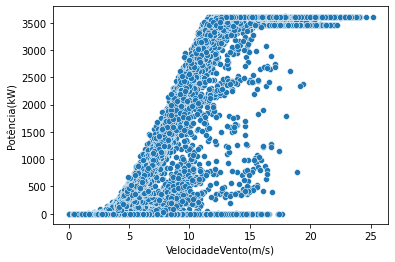

In [ ]:
# Em função da velocidade do vento:
sns.scatterplot(data = T1, x= 'VelocidadeVento(m/s)', y='Potência(kW)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


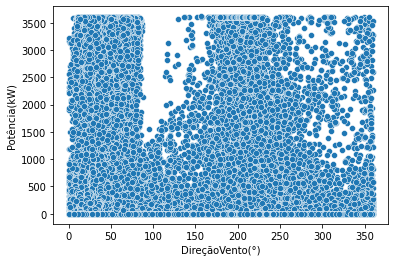

In [ ]:
# Em função da direção do vento:
sns.scatterplot(T1['DireçãoVento(°)'], T1['Potência(kW)'])

#### Como a correlação com a velocidade do vento é maior, iremos nos focar nela.

###### Gráfico de dispersão (potência teórica):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


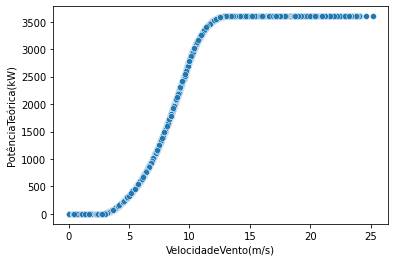

In [ ]:
# Em função da velocidade do vento:
sns.scatterplot(T1['VelocidadeVento(m/s)'], T1['PotênciaTeórica(kW)'])

## 3º Estabelecendo "limites aceitáveis" 

In [ ]:
# Existem várias potências fora da curva de dispersão teórica. Para identificá-los, estou considerando 5% de acurácia, ou seja, a potência máxima e mínima deverá ser 105% e 95% da potência teórica, respectivamente.
PotReal = T1['Potência(kW)'].tolist()
PotTeorica = T1['PotênciaTeórica(kW)'].tolist()
PotMax = []
PotMin = []
Limite = []

for potencia in PotTeorica:
  PotMax.append(potencia*1.05)
  PotMin.append(potencia*0.95)

for p, potencia in enumerate(PotReal):
  if potencia >= PotMin[p] and potencia <= PotMax[p]:
    Limite.append('Aceitável')
  elif potencia == 0:
    Limite.append('Potência nula')
  else:
    Limite.append('Não aceitável')

In [ ]:
# Conferindo a quantidade de valores aceitáveis, inaceitáveis ou nulos:
print('Valores aceitáveis: \n', Limite.count('Aceitável'))
print('Valores não aceitáveis: \n', Limite.count('Não aceitável'))
print('Potência nula: \n', Limite.count('Potência nula'))

Valores aceitáveis: 
 18841
Valores não aceitáveis: 
 28192
Potência nula: 
 3497


In [ ]:
# Adicionando a lista 'Limite' ao datafame 'T1':
T1['Limite'] = Limite
T1

,Data/hora,Potência(kW),VelocidadeVento(m/s),PotênciaTeórica(kW),DireçãoVento(°),Limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,Não aceitável
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,Não aceitável
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,Não aceitável
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,Não aceitável
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,Não aceitável
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,Não aceitável
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,Não aceitável
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,Não aceitável
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,Aceitável


## 4º Plotando o gráfico novamente

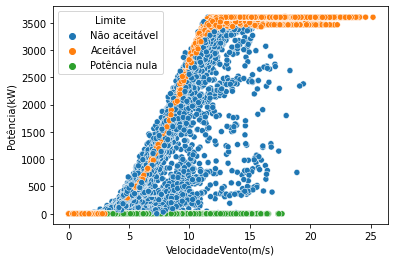

In [ ]:
# Gráfico de dispersão (potência real):

sns.scatterplot(data = T1, x= 'VelocidadeVento(m/s)', y='Potência(kW)', hue='Limite')

In [ ]:
#### Agora seria o momento de analisar se há algo de errado com os valores que se encontram com potência nula ou não aceitáveis, demonstrado-os ao pessoal responsável.